In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("urbanGB-simple.csv")
X = df.values

In [2]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

c:\Users\kocan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kocan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\kocan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kocan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

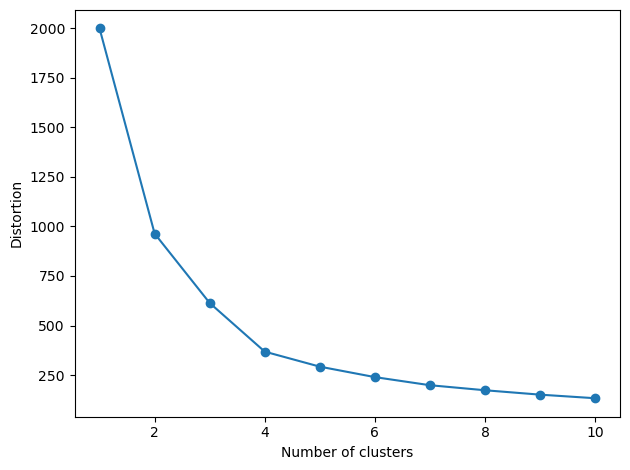

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()

c:\Users\kocan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kocan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\kocan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kocan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

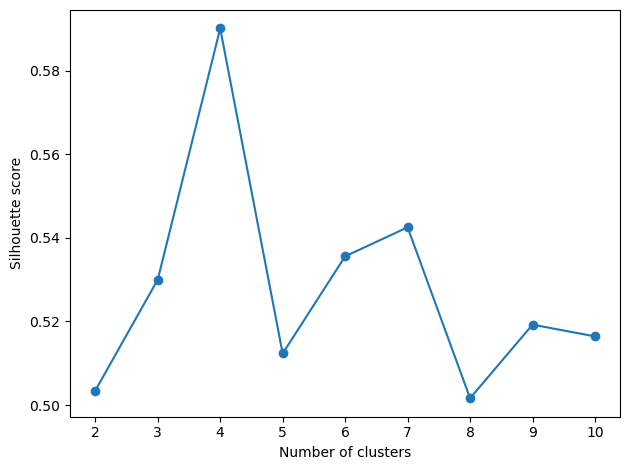

In [4]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    
    y_km = km.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, y_km, metric='euclidean'))
    
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.tight_layout()

plt.show()

In [5]:
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
y_km = km.fit_predict(X)

c:\Users\kocan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kocan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


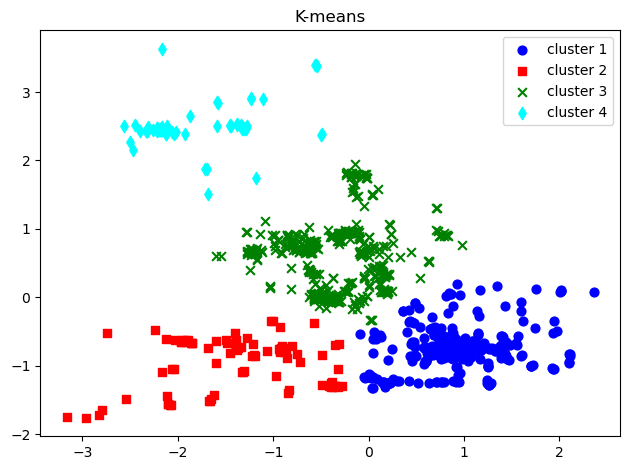

In [6]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            c='blue', marker='o', s=40,
            label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            c='red', marker='s', s=40,
            label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1],
            c='green', marker='x', s=40,
            label='cluster 3')
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1],
            c='cyan', marker='d', s=40,
            label='cluster 4')

plt.title('K-means')
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=14)
y_db = db.fit_predict(X)


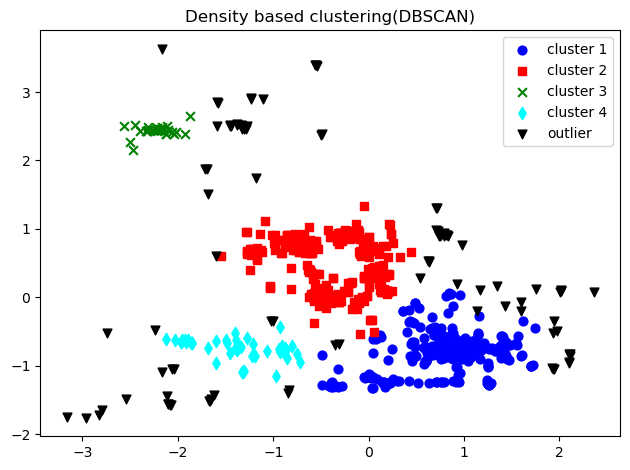

In [18]:
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='blue', marker='o', s=40,
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            label='cluster 2')
plt.scatter(X[y_db == 2, 0], X[y_db == 2, 1],
            c='green', marker='x', s=40,
            label='cluster 3')
plt.scatter(X[y_db == 3, 0], X[y_db == 3, 1],
            c='cyan', marker='d', s=40,
            label='cluster 4')
plt.scatter(X[y_db == -1, 0], X[y_db == -1, 1],
            c='black', marker='v', s=40,
            label='outlier')

plt.title('Density based clustering(DBSCAN)')
plt.legend()
plt.tight_layout()
plt.show()